<a href="https://colab.research.google.com/github/AfrozSaqlain/Convolutional-Neural-Network/blob/main/Lensed_vs_Unlensed_vs_Precessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !git clone https://git.ligo.org/anuj.mishra/gwmat.git

Cloning into 'gwmat'...
remote: Enumerating objects: 2048, done.
remote: Counting objects: 100% (2048/2048), done.
remote: Compressing objects: 100% (1074/1074), done.
remote: Total 2048 (delta 1014), reused 1933 (delta 954), pack-reused 0 (from 0)
Receiving objects: 100% (2048/2048), 77.19 MiB | 23.81 MiB/s, done.
Resolving deltas: 100% (1014/1014), done.


In [ ]:
# %cd gwmat

/content/gwmat


In [ ]:
# !pip install .

In [ ]:
# !pip install bilby pycbc gwpy

In [ ]:
# import warnings
# warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

# from pycbc.waveform.waveform import get_fd_waveform
# import matplotlib.pyplot as plt
# import os
# from pathlib import Path
# from multiprocessing import Pool
# import sys
# import gc
# import gwmat
# import bilby
# import pandas as pd
# import numpy as np
# from gwpy.timeseries import TimeSeries as ts

# num_processes = os.cpu_count()
# num = 20

# # Accessing directories

# os.makedirs('training', exist_ok=True)
# training_data_path = Path("training/")

# os.makedirs(training_data_path / 'lensed', exist_ok=True)
# os.makedirs(training_data_path / 'unlensed', exist_ok=True)
# os.makedirs(training_data_path / 'unlensed_precess', exist_ok=True)
# lensed_path = training_data_path / "lensed"
# unlensed_path = training_data_path / "unlensed"
# precessed_path = training_data_path / "unlensed_precess"

# # Creating samples for training data

# prior = bilby.core.prior.PriorDict()

# prior['Log_Mlz'] = bilby.core.prior.Uniform(minimum = 3, maximum = 5)
# prior['yl'] = bilby.core.prior.PowerLaw(alpha = 1, minimum = 0.01, maximum = 1)
# prior['phase'] = bilby.core.prior.Uniform(minimum=0.0, maximum=2*np.pi, boundary="periodic")
# prior['geocent_time'] = bilby.core.prior.Uniform(minimum=-0.1, maximum=0.1)

# prior['mass_1'] = bilby.core.prior.Uniform(minimum=5, maximum=100)  # Adjust range as needed
# prior['mass_2'] = bilby.core.prior.Uniform(minimum=5, maximum=100)

# prior['a_1'] = bilby.core.prior.Uniform(minimum=0, maximum=1)  # Spin magnitude is between 0 and 1
# prior['a_2'] = bilby.core.prior.Uniform(minimum=0, maximum=1)

# prior['tilt_1'] = bilby.core.prior.Sine(minimum=0, maximum=np.pi)  # Tilt angles are between 0 and π
# prior['tilt_2'] = bilby.core.prior.Sine(minimum=0, maximum=np.pi)

# prior['phi_jl'] = bilby.core.prior.Uniform(minimum=0, maximum=2*np.pi)
# prior['phi_12'] = bilby.core.prior.Uniform(minimum=0, maximum=2*np.pi)

# prior['ra'] = bilby.core.prior.Uniform(minimum=0, maximum=2*np.pi)  # Right ascension
# prior['dec'] = bilby.core.prior.Cosine(minimum=-np.pi/2, maximum=np.pi/2)  # Declination

# prior['psi'] = bilby.core.prior.Uniform(minimum=0, maximum=np.pi)  # Polarization angle
# prior['theta_jn'] = bilby.core.prior.Sine(minimum=0, maximum=np.pi)  # Inclination angle

# prior['luminosity_distance'] = bilby.core.prior.PowerLaw(alpha=-2, minimum=10, maximum=5000)

# priors = prior.sample(num)

# df = list((pd.DataFrame(priors)).iterrows())

# param_result = [result[0] for result in map(lambda x: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters(x[1]), df)]

# # Generating training data
# def generate_training_qtransform(num):
#     param_gen = param_result[num].copy()

#     init_params = dict(wf_domain="TD", f_start=15, snr_f_min=20., snr_f_max=None,
#                 f_ref=20., sample_rate=2048, delta_t=None, wf_approximant="IMRPhenomPv2",
#                 ifo_list = ['H1', 'L1', 'V1'])

#     m_lens=np.power(10., param_gen.pop("Log_Mlz"))
#     y_lens=param_gen.pop("yl")

#     lens_params = dict(m_lens=m_lens, y_lens=y_lens, z_lens=0.,
#                     lens_mass_lower_limit=1.e-3, Ff_data=None)

#     cbc_params =  param_gen
#     if cbc_params['mass_2'] > cbc_params['mass_1']:
#          cbc_params['mass_1'], cbc_params['mass_2'] = cbc_params['mass_2'], cbc_params['mass_1']
#          print('\nInversion Done!!!\n')

#     misc_params = dict(rwrap = -0.1, cyclic_time_shift_method = "gwmat",
#                     taper_hp_hc=True,  hp_hc_extra_padding_at_start=0,
#                     make_hp_hc_duration_power_of_2=True,
#                     extra_padding_at_start=1, extra_padding_at_end=2,
#                     save_data=False, data_outdir = './',
#                     data_label=None, data_channel='PyCBC-Injection')

#     psd_params = dict(Noise=True, psd_H1="O4", psd_L1="O4", psd_V1="O4",
#                     noise_seed=None, is_asd_file=False, psd_f_low=None)

#     precession_keys = {'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_jl', 'phi_12'}

#     # Copy all key-value pairs but set precession-related keys to zero
#     no_precession_params = {key: (0 if key in precession_keys else value) for key, value in cbc_params.items()}

#     lensing_params = {**init_params, **no_precession_params, **lens_params, **psd_params, **misc_params}

#     nolens_params = dict(m_lens=0, y_lens=0, z_lens=0.,
#                     lens_mass_lower_limit=1.e-3, Ff_data=None)

#     unlensing_params = {**init_params, **no_precession_params, **nolens_params, **psd_params, **misc_params}

#     unlensing_precessing_params = {**init_params, **nolens_params, **cbc_params, **psd_params, **misc_params}

#     lens_res = gwmat.injection.simulate_injection_with_comprehensive_output(**lensing_params)
#     unlens_res = gwmat.injection.simulate_injection_with_comprehensive_output(**unlensing_params)
#     unlens_precess_res = gwmat.injection.simulate_injection_with_comprehensive_output(**unlensing_precessing_params)

#     wf_lens_h = lens_res['noisy_ifo_signal']['H1']
#     wf_unlens_h = unlens_res['noisy_ifo_signal']['H1']
#     wf_unlens_precess_h = unlens_precess_res['noisy_ifo_signal']['H1']

#     wf_lens_l = lens_res['noisy_ifo_signal']['L1']
#     wf_unlens_l = unlens_res['noisy_ifo_signal']['L1']
#     wf_unlens_precess_l = unlens_precess_res['noisy_ifo_signal']['L1']

#     wf_lens_v = lens_res['noisy_ifo_signal']['V1']
#     wf_unlens_v = unlens_res['noisy_ifo_signal']['V1']
#     wf_unlens_precess_v = unlens_precess_res['noisy_ifo_signal']['V1']

#     if lens_res['matched_filter_snr']['H1'] > 10.0:
#         wf_lens_h = ts.from_pycbc(wf_lens_h)
#         wf_unlens_h = ts.from_pycbc(wf_unlens_h)
#         wf_unlens_precess_h = ts.from_pycbc(wf_unlens_precess_h)

#         plt.figure(figsize=(12,8), facecolor=None)
#         plt.pcolormesh(wf_lens_h.q_transform(logf=True, norm='mean', outseg=(-1.2, 0.2), frange=(20,512), whiten=False, qrange=(4, 64)))
#         plt.axis("off")
#         plt.savefig(lensed_path / f"$M_l$_{m_lens}_y_{y_lens}_h.png")
#         plt.close()

#         plt.figure(figsize=(12,8), facecolor=None)
#         plt.pcolormesh(wf_unlens_h.q_transform(logf=True, norm='mean', outseg=(-1.2, 0.2), frange=(20,512), whiten=False, qrange=(4, 64)))
#         plt.axis("off")
#         plt.savefig(unlensed_path / f"$M_l$_{m_lens}_y_{y_lens}_h.png")
#         plt.close()

#         plt.figure(figsize=(12,8), facecolor=None)
#         plt.pcolormesh(wf_unlens_precess_h.q_transform(logf=True, norm='mean', outseg=(-1.2, 0.2), frange=(20,512), whiten=False, qrange=(4, 64)))
#         plt.axis("off")
#         plt.savefig(precessed_path / f"$M_l$_{m_lens}_y_{y_lens}_h.png")
#         plt.close()

#     if lens_res['matched_filter_snr']['L1'] > 10.0:
#         wf_lens_l = ts.from_pycbc(wf_lens_l)
#         wf_unlens_l = ts.from_pycbc(wf_unlens_l)
#         wf_unlens_precess_l = ts.from_pycbc(wf_unlens_precess_l)

#         plt.figure(figsize=(12,8), facecolor=None)
#         plt.pcolormesh(wf_lens_l.q_transform(logf=True, norm='mean', outseg=(-1.2, 0.2), frange=(20,512), whiten=False, qrange=(4, 64)))
#         plt.axis("off")
#         plt.savefig(lensed_path / f"$M_l$_{m_lens}_y_{y_lens}_l.png")
#         plt.close()

#         plt.figure(figsize=(12,8), facecolor=None)
#         plt.pcolormesh(wf_unlens_l.q_transform(logf=True, norm='mean', outseg=(-1.2, 0.2), frange=(20,512), whiten=False, qrange=(4, 64)))
#         plt.axis("off")
#         plt.savefig(unlensed_path / f"$M_l$_{m_lens}_y_{y_lens}_l.png")
#         plt.close()

#         plt.figure(figsize=(12,8), facecolor=None)
#         plt.pcolormesh(wf_unlens_precess_l.q_transform(logf=True, norm='mean', outseg=(-1.2, 0.2), frange=(20,512), whiten=False, qrange=(4, 64)))
#         plt.axis("off")
#         plt.savefig(precessed_path / f"$M_l$_{m_lens}_y_{y_lens}_l.png")
#         plt.close()

#     if lens_res['matched_filter_snr']['V1'] > 10.0:
#         wf_lens_v = ts.from_pycbc(wf_lens_v)
#         wf_unlens_v = ts.from_pycbc(wf_unlens_v)
#         wf_unlens_precess_v = ts.from_pycbc(wf_unlens_precess_v)

#         plt.figure(figsize=(12,8), facecolor=None)
#         plt.pcolormesh(wf_lens_v.q_transform(logf=True, norm='mean', outseg=(-1.2, 0.2), frange=(20,512), whiten=False, qrange=(4, 64)))
#         plt.axis("off")
#         plt.savefig(lensed_path / f"$M_l$_{m_lens}_y_{y_lens}_v.png")
#         plt.close()

#         plt.figure(figsize=(12,8), facecolor=None)
#         plt.pcolormesh(wf_unlens_v.q_transform(logf=True, norm='mean', outseg=(-1.2, 0.2), frange=(20,512), whiten=False, qrange=(4, 64)))
#         plt.axis("off")
#         plt.savefig(unlensed_path / f"$M_l$_{m_lens}_y_{y_lens}_v.png")
#         plt.close()

#         plt.figure(figsize=(12,8), facecolor=None)
#         plt.pcolormesh(wf_unlens_precess_v.q_transform(logf=True, norm='mean', outseg=(-1.2, 0.2), frange=(20,512), whiten=False, qrange=(4, 64)))
#         plt.axis("off")
#         plt.savefig(precessed_path / f"$M_l$_{m_lens}_y_{y_lens}_v.png")
#         plt.close()

#     del wf_lens_h, wf_unlens_h, wf_unlens_precess_h
#     del lens_res, unlens_res, unlens_precess_res
#     gc.collect()

# num_range = list(range(int(num)))

# with Pool(processes=num_processes) as pool:
#         qtransforms = pool.map(generate_training_qtransform, num_range)

In [ ]:
# %mv training ../

In [ ]:
# %cd ..
# !pwd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import shutil
# shutil.move("training", "/content/drive/My Drive/")

'/content/drive/My Drive/training'

In [ ]:
import shutil
shutil.copytree("/content/drive/My Drive/training", "training")

'training'

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from typing import Dict, List

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class CustomCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomCNN, self).__init__()

        filter_sizes = [16, 16, 16, 32, 32, 32, 64, 64, 64, 64, 64,
                        128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
        strides = [(1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1),
                   (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2),
                   (1, 1), (1, 1), (1, 1), (1, 1), (2, 2)]

        self.conv_layers = nn.ModuleList()
        in_channels = 3

        for out_channels, stride in zip(filter_sizes, strides):
            self.conv_layers.append(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
            )
            in_channels = out_channels

        self.dropout = nn.Dropout(0.1)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(24320, num_classes)

    def forward(self, x):
        for conv in self.conv_layers:
            x = conv(x)
            x = F.elu(x)
            x = self.dropout(x)

        x = self.flatten(x)
        x = self.fc(x)
        return x

In [ ]:
model = CustomCNN(num_classes=3)
model = torch.compile(model)
model = model.to(device)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.005)
print(model)

OptimizedModule(
  (_orig_mod): CustomCNN(
    (conv_layers): ModuleList(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7-9): 3 x Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12-14): 3 x Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(300, 600)),
    transforms.ToTensor()
])

In [ ]:
train_dir = Path('training')
test_dir = Path('testing')

In [ ]:
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform = None)

In [ ]:
BATCH_SIZE = 10
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = os.cpu_count(),
                              shuffle = True)

In [ ]:
train_data.classes

['lensed', 'unlensed', 'unlensed_precess']

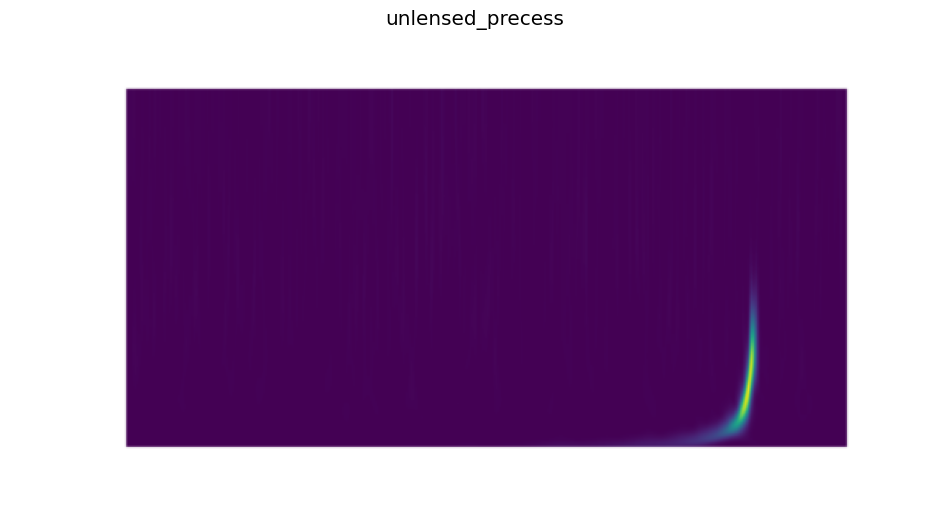

In [ ]:
data_iter = iter(train_dataloader)
image, label = next(data_iter)
image = image[0].permute(1, 2, 0).numpy()
plt.figure(figsize=(12,8), facecolor=None)
plt.imshow(image)
plt.title(f"{train_data.classes[label[0]]}")
plt.axis(False)
plt.show()

In [ ]:
model.train()
for i in range(50):
  total_loss = 0
  for batch, (x, y) in enumerate(train_dataloader):
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      y_pred = model(x)
      loss = loss_fn(y_pred, y)
      total_loss += loss.item()
      loss.backward()
      optimizer.step()
  total_loss = total_loss / len(train_dataloader)
  if i % 10 == 0:
    print(f"Epoch: {i} | Loss: {total_loss}")

Epoch: 0 | Loss: 107734.96033084393
Epoch: 10 | Loss: 3.579786843723721
Epoch: 20 | Loss: 2.804043995009528


KeyboardInterrupt: 

In [ ]:
model.eval()
for i, (x, y) in enumerate(train_dataloader):
    x, y = x.to(device), y.to(device)
    y_pred = model(x)
    print(y_pred)
    print(torch.softmax(y_pred, dim = 1))
    print(torch.softmax(y_pred, dim = 1).argmax(dim = 1))

tensor([[-0.0093,  0.0211, -0.0037],
        [-0.0093,  0.0211, -0.0037],
        [-0.0093,  0.0211, -0.0037],
        [-0.0093,  0.0211, -0.0037],
        [-0.0093,  0.0211, -0.0037],
        [-0.0093,  0.0211, -0.0037],
        [-0.0093,  0.0211, -0.0037],
        [-0.0093,  0.0211, -0.0037],
        [-0.0093,  0.0211, -0.0037],
        [-0.0093,  0.0211, -0.0037]], device='cuda:0',
       grad_fn=<CompiledFunctionBackward>)
tensor([[0.3293, 0.3395, 0.3312],
        [0.3293, 0.3395, 0.3312],
        [0.3293, 0.3395, 0.3312],
        [0.3293, 0.3395, 0.3312],
        [0.3293, 0.3395, 0.3312],
        [0.3293, 0.3395, 0.3312],
        [0.3293, 0.3395, 0.3312],
        [0.3293, 0.3395, 0.3312],
        [0.3293, 0.3395, 0.3312],
        [0.3293, 0.3395, 0.3312]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
tensor([[-0.0093,  0.0211, -0.0037],
        [-0.0093,  0.0211, -0.0037],
        [-0.0093,  0.0211, -0.0037],
        [-0.0093

# Using Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
from pathlib import Path

In [ ]:
class CustomCNN(keras.Model):
    def __init__(self, num_classes=3):
        super(CustomCNN, self).__init__()

        filter_sizes = [16, 16, 16, 32, 32, 32, 64, 64, 64, 64, 64,
                        128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
        strides = [(1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1),
                   (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2),
                   (1, 1), (1, 1), (1, 1), (1, 1), (2, 2)]

        self.conv_layers = []
        in_channels = 3

        for out_channels, stride in zip(filter_sizes, strides):
            self.conv_layers.append(
                layers.Conv2D(filters=out_channels, kernel_size=3, strides=stride,
                              padding="same", activation="elu")  # ELU activation added
            )
            in_channels = out_channels  # Update input channels for the next layer

        self.dropout = layers.Dropout(0.1)
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(100, activation="elu")  # ELU activation added
        self.fc2 = layers.Dense(num_classes, activation=None)  # Keep logits for loss function

    def call(self, inputs, training=False):
        x = inputs
        for conv in self.conv_layers:
            x = conv(x)
            x = self.dropout(x, training=training)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Create an instance of the model
model = CustomCNN(num_classes=3)

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Data Preprocessing
data_dir = Path("training")  # Root directory of the dataset

data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255  # Normalize images
)

train_data = data_generator.flow_from_directory(
    directory=data_dir,
    target_size=(300, 600),  # Resize images
    batch_size=10,
    class_mode='sparse'  # Sparse labels for integer-based classification
)

Found 180 images belonging to 3 classes.


In [ ]:
EPOCHS =100
for epoch in range(EPOCHS):
    total_loss = 0
    num_batches = 0

    for x, y in train_data:
        loss = model.train_on_batch(x, y)
        total_loss += loss[0]  # loss[0] contains the loss value
        num_batches += 1

        # Stop iteration once all training data has been processed in this epoch
        if num_batches >= len(train_data):
            break

    avg_loss = total_loss / num_batches
    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {avg_loss:.4f}")

Epoch 0 | Loss: 52966.2988
Epoch 10 | Loss: 4581.2527
Epoch 20 | Loss: 2348.7943
Epoch 30 | Loss: 1579.5900
Epoch 40 | Loss: 1190.0606


In [ ]:
model.summary()

Model: "custom_cnn_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (10, 300, 600, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (10, 300, 600, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (10, 150, 300, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (10, 150, 300, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (10, 150, 300, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (10, 75, 150, 32)           │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (10, 75, 150, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (10, 75, 150, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (10, 75, 150, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (10, 75, 150, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (10, 38, 75, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (10, 38, 75, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (10, 38, 75, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (10, 38, 75, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (10, 38, 75, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (10, 19, 38, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (10, 19, 38, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (10, 19, 38, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (10, 19, 38, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (10, 19, 38, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (10, 10, 19, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 12,086,843 (46.11 MB)

 Trainable params: 4,028,947 (15.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,057,896 (30.74 MB)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load the trained model
model.evaluate(train_data)  # Evaluate accuracy on training data

# Get True Labels & Predictions
y_true = []
y_pred = []

for x_batch, y_batch in train_data:
    preds = model.predict(x_batch)  # Raw logits
    preds = np.argmax(preds, axis=1)  # Convert logits to class labels

    y_true.extend(y_batch)
    y_pred.extend(preds)

    if len(y_true) >= train_data.samples:  # Stop once all data is processed
        break

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.3233 - loss: 1.0986
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


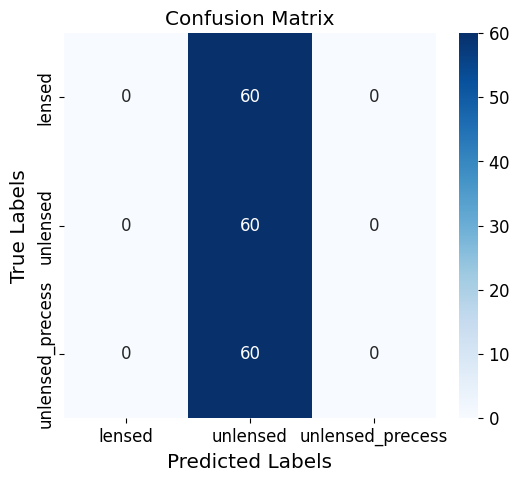

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        60
         1.0       0.33      1.00      0.50        60
         2.0       0.00      0.00      0.00        60

    accuracy                           0.33       180
   macro avg       0.11      0.33      0.17       180
weighted avg       0.11      0.33      0.17       180



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices, yticklabels=train_data.class_indices)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

In [ ]:
# Load pre-trained VGG19 model (without top classification layers)
base_model = keras.applications.VGG19(
    include_top=False,  # Exclude the default classification head
    weights="imagenet",  # Use pre-trained ImageNet weights
    input_shape=(224, 224, 3)  # Adjust based on your dataset's image size
)

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Build the new model with a custom classification head
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation="elu"),  # Fully connected layer with ELU activation
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(3, activation="softmax")  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,871,491 (125.39 MB)

 Trainable params: 12,847,107 (49.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
# Data Preprocessing
data_dir = Path("training")  # Root directory of the dataset

data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255  # Normalize images
)

train_data = data_generator.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),  # Resize images
    batch_size=10,
    class_mode='sparse'  # Sparse labels for integer-based classification
)

Found 180 images belonging to 3 classes.


In [ ]:
EPOCHS =100
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False)

for epoch in range(EPOCHS):
    total_loss = 0
    num_batches = 0

    for x, y in train_data:
        loss = model.train_on_batch(x, y)
        total_loss += loss[0]  # loss[0] contains the loss value
        num_batches += 1

        # Stop iteration once all training data has been processed in this epoch
        if num_batches >= len(train_data):
            break

    avg_loss = total_loss / num_batches
    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {avg_loss:.4f}")

Epoch 0 | Loss: 1.9513
Epoch 10 | Loss: 1.3588
Epoch 20 | Loss: 1.2502
Epoch 30 | Loss: 1.1885
Epoch 40 | Loss: 1.1440
Epoch 50 | Loss: 1.1084
Epoch 60 | Loss: 1.0890
Epoch 70 | Loss: 1.0662
Epoch 80 | Loss: 1.0480
Epoch 90 | Loss: 1.0354


In [ ]:
# Load the trained model
model.evaluate(train_data)  # Evaluate accuracy on training data

# Get True Labels & Predictions
y_true = []
y_pred = []

for x_batch, y_batch in train_data:
    preds = model.predict(x_batch)  # Raw logits
    preds = np.argmax(preds, axis=1)  # Convert logits to class labels

    y_true.extend(y_batch)
    y_pred.extend(preds)

    if len(y_true) >= train_data.samples:  # Stop once all data is processed
        break

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.6316 - loss: 0.7324
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


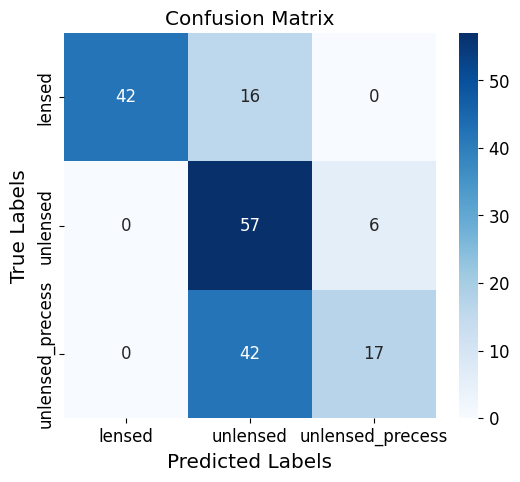

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.72      0.84        58
         1.0       0.50      0.90      0.64        63
         2.0       0.74      0.29      0.41        59

    accuracy                           0.64       180
   macro avg       0.74      0.64      0.63       180
weighted avg       0.74      0.64      0.63       180



In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices, yticklabels=train_data.class_indices)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))